# Measuring the optimal temperature of a tungsten light bulb using numerical methods.
##### Konrad A. Kusiak

## Introduction

A light bulb with a filament made of tungsten works on a simple principle: the filament is heated up with an electric current until it starts glowing. The process continues further, making the tungsten glow brighter and brighter until it reaches its maximum brilliance capacity. At this point, the further flow of an electric current and resulting heating up the tungsten causes only the increase of the temperature but the emitted visible light is not getting stronger. 
This process suggests that a tungsten filament emits also other types of radiation, apart from the visible light. Indeed, tungsten filament can be modeled as a black body and the radiation that it emits takes a form of a continuous Planck function.

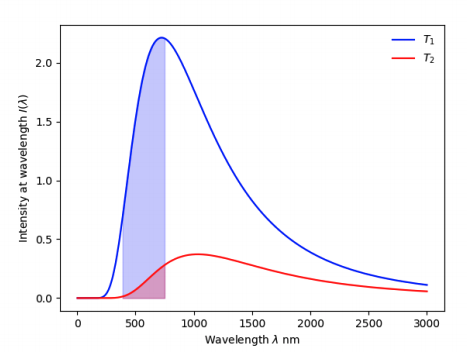
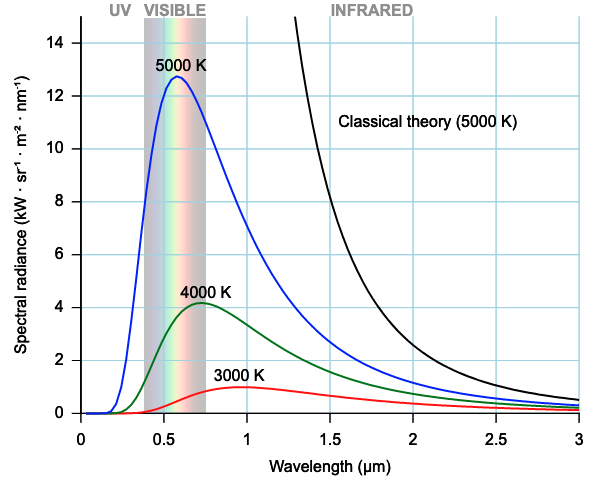
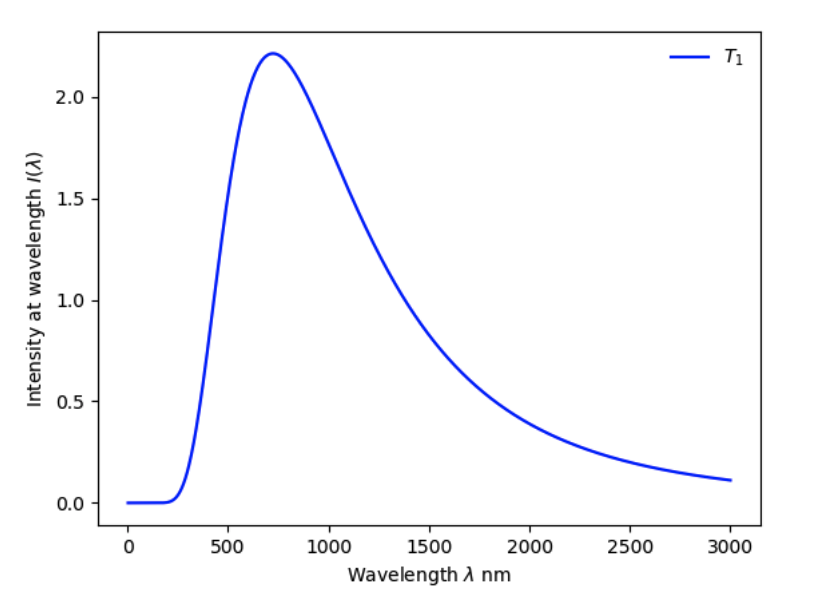
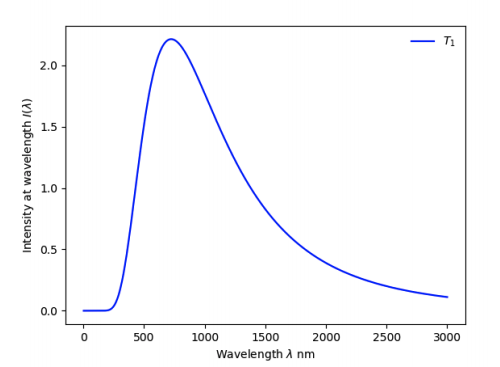

The above figure shows a typical shape of a continues Planck spectrum function for a black body, for some temperature $T_1$ and different spectrum for tempereature $T_2$. 
The coloured regions correspond to the intensities at visible wavelengths. The formula for the intensity function for a given temperature $T$ takes the form:
$$
I(\lambda) = 2\pi 4Ahc^2 \dfrac{\lambda^{-5}}{e^{hc/\lambda k_B T}-1}
$$
where $A$ is the area of the glowing filament, $c$ is the speed of light, $h$ is the Planck constant and $k_B$ is the Boltzman constant.

The efficiency of the light bulb can be calculated therefore as the fraction of the power emitted in visible wavelengths vs the power emitted at all wavelengths.
$$
\eta(T) = \dfrac{P_{vis}}{P_{tot}}
$$

Considering the above figure, the efficiency is just the fraction of the area of the coloured region with respect to the whole area under the curve. In a more mathematical manner that will take a form of an integral:
$$
P_{vis} = \int_{390}^{750} I(\lambda)d\lambda, \ \ \ P_{tot} = \int_{0}^{\infty} I(\lambda)d\lambda
$$

where it was assumed that the visible light ranges from $390nm$ to $750nm$. By making the substitution: $x= hc/\lambda k_B T$ and using the exact value for the $P_{tot}$, we can obtain the formula for efficiency that is dependent only on the temperature $T$:
$$
\eta(T) = \frac{15}{\pi^4}\int_{hc/(\lambda_2 k_B T)}^{hc/(\lambda_1 k_B T)} \frac{x^{3}}{e^{x}-1} \,\mathrm{d} x.
$$

In this work, the optimal temperature of a tungsten light bulb is inspected that is the one where the efficiency is the highest. The approach used in this notebook focuses on finding the maxima of the efficiency formula dependent only on the temperature. The $\eta(T)$ will be evaluated numerically. The maxima are going to be found by looking for the value of derivative of $\eta(T)$ that is the closest to 0.

Studying the efficiency of a tungsten light bulb can help us in realizing how accurate is to model tungsten as a black body. Moreover, it is needed in deciding if there are maybe other materials that would result in greater efficiency when used in light bulbs. Lastly, using numerical methods for such real and physical questions can shed the light on which techniques are the most appropriate for such problems

## Methods


The integral in the efficiency formula $\eta(T)$ in the cell (5) cannot be solved analytically. Therefore, the numerical approach is taken by using the `integrate.quad` method from the `scipy` library [2]. This library is also used to import the necessary physical constants like the speed of light `c`, Boltzmann constant `k` and Planck constant `h`.
NumPy package is also imported in order to handle mathematical operations on the array. Also, `pi`, and the exponential function `exp` are imported from NumPy.

In [23]:
from scipy.constants import k, c, h
from numpy import pi, exp
import numpy as np
import scipy.integrate as integrate

f = lambda x: pow(x,3)/(exp(x)-1)                              # The function inside the integral

def vsbEfficiency(T):
    """ The function calculates the efficiency of a tungsten 
        light bulb for a given temperature T. 
        It uses the integrate.quad method from the scipy library.
        It assumes visible light from 390nm to 750nm. """
    
    a = h*c/(750*1e-9*k*T)                                     # a and b are integration boundaries
    b = h*c/(390*1e-9*k*T)
    return (15/pow(pi,4)) * np.array(integrate.quad(f,a,b))    # np.array needed in order to multiply the integration result by the constant

In the above cell, the two functions were defined. The first one,`f(x)` is just the function inside the integral in cell (5): 
$$
f(x) = \dfrac{x^3}{e^x -1}
$$
It is used in the latter method, the `vsbEfficiency(T)` which handles the integration and returns a tuple of `(efficiency at T, error in the result)` where `T is the given temperature`. In this way, we have the needed definition of the $\eta(T)$ from cell (5).

The efficiency of the light bulb was computed and plotted in the temperature range from $300K$ to $10000K$ with the steps of $1K$.

In order to find the maximum efficiency, the `vsbEfficiency` function needs to be differentiated and the point at which the highest efficiency lies will be where the derivative is the closest to 0. Since the integral in the $\eta(T)$ function cannot be solved analytically, we cannot compare results from different methods with the exact values. Therefore, the choice of the approach will rely only on the general pros and cons of each method. 

In the previous work [3], we compared 3 algorithms for calculating numerical derivative: Forward difference, Central difference, and Extrapolated difference algorithm. We found out that each approach can prove itself to work better in different situations. Their correctness and precision depend on the function that we want to differentiate and on the step size $h$ that we use.
The 3 methods have in common the fact that the more precise we want to get by decreasing the step size $h$, the more exposed we are to subtractive cancellation. 
The fourth method, that eliminates this problem is the Imaginary step algorithm. This approach will not be used, because the `scipy.integrate.quad` algorithm doesn't support imaginary numbers, which are needed for `IS` algorithm.
Instead, the `CD` algorithm will be used as it lies in the middle between the previous two, regarding the accuracy and speed.

The central difference algorithm takes the following form
$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$
It can be shown by using Taylor expansion, that the error of this algorithm is proportional to $O(h^2)$. 

In [24]:
def CD(f,x,h):
    """  Central difference algorithm that computes a derivative of a given function f 
       at specified point x, with the step h. Error: O(h^2)  """

    # computing arguments that are fed into the function f.
    val_1 = x + 0.5*h
    val_2 = x - 0.5*h

    return (f(val_1)-f(val_2))/h

To feed the `vsbEfficiency` function into `CD`, it had to be redefined so that it outputs only the value of efficiency, without the error. It was done by creating a new `lambda` function with this slight change.

In [31]:
efficiency = lambda T: vsbEfficiency(T)[0]     # Function doesn't return a numpy array with value and error, but just a single value.

The derivative was computed with the step $h = 0.001$ at the temperature range form $300K$ to $10000K$. 
The results were plotted and by inspection, the range where the function has a root was estimated.
Then, using this information, the smallest absolute value of the derivative was found and from that, the maximum temperature was obtained.

The plotting of the results was created by using the `pylab` package and its coponents such as `plot` and `figure`.

In [32]:
%matplotlib inline
from pylab import linspace, xlabel, ylabel, title, legend, figure, plot, ylim

## Results

The code below, calculates the efficiency in the range: (300K, 10000K). It stores the results in the `efficiency` array and puts the corresponding errors into `errors` array. It then plots the results.

In [33]:
# Arrays that store the data for plotting.
efficiencies = []
errors = []
# Main loop that creates the data points from T=300 to T=10000 degrees K.
for T in range(300, 10001):
    eff = vsbEfficiency(T)
    efficiencies.append(eff[0])
    errors.append(eff[1])

Text(0.5, 1.0, 'Efficiency vs Temperature')

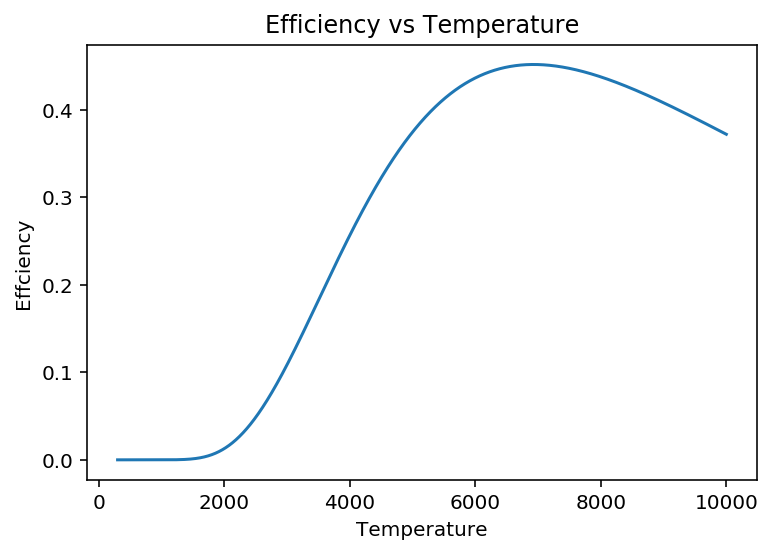

In [34]:
figure()
x_axis = linspace(300, 10001, 9701)
plot(x_axis, efficiencies, '-')
xlabel('Temperature') 
ylabel('Effciency')
title('Efficiency vs Temperature')

Text(0.5, 1.0, 'Errors vs Temperature')

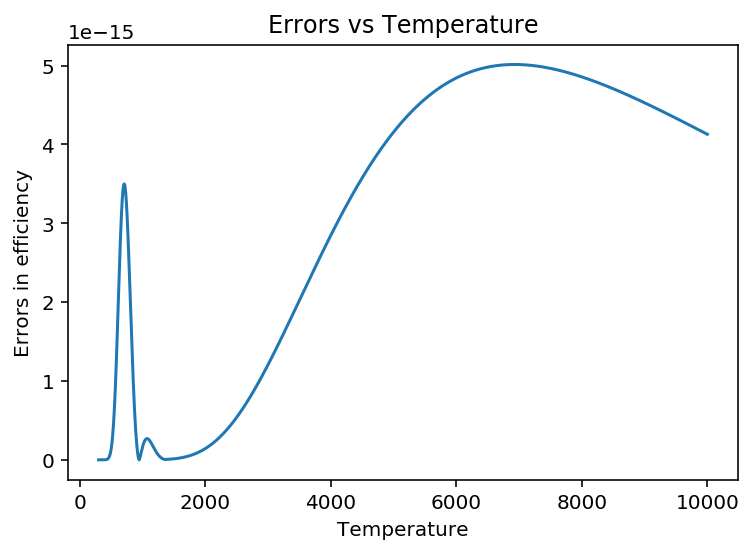

In [35]:
figure()
plot(x_axis, errors, '-')
xlabel('Temperature') 
ylabel('Errors in efficiency')
title('Errors vs Temperature') 

In order to find the maximum of the $\eta (T)$ we need to inspect where is the point at which the derivative of this function vanishes - that will be the peak at around 6000K, from the first plot.
The derivative could also vanish at the very beginning of the $\eta (T)$ since from observing it graphically, we can see it's flat there. In order to get the correct result, we need to cut off this part when calculating the final results.

Text(0, 0.5, 'derivative')

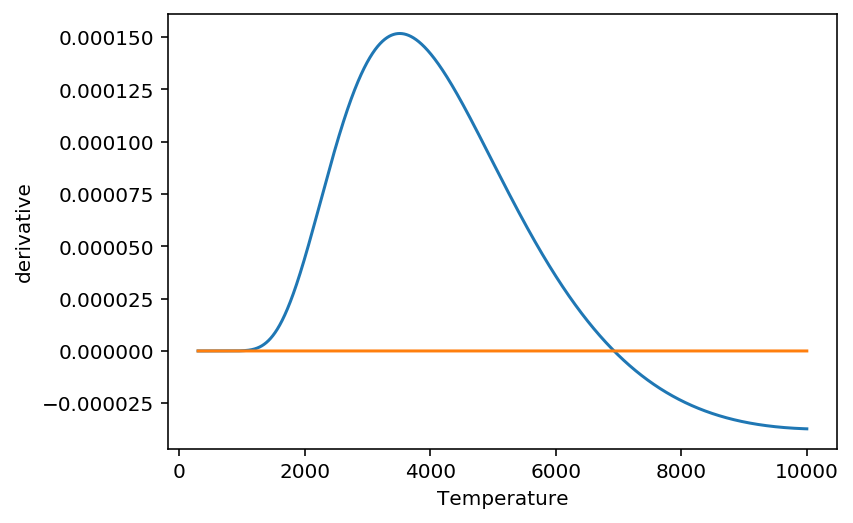

In [36]:
eff_deriv = []             # Array for the value of derivatives at each point.

for T in range(300, 10001):
    df = CD(efficiency,T,0.001)
    eff_deriv.append(df)
figure()
plot(x_axis, eff_deriv, x_axis, [0 for i in range(9701)])
xlabel('Temperature') 
ylabel('derivative')

The orange line marks the `x=0` axis. We can clearly see that the root that we are interested in, lies between $6000K$ and $8000K$. The above chart might give the wrong impression that we have a continuous function here. In reality, this only seems like a continuous function but those are still separate data points. Because of that, we can see that the plotted data is crossing a point at which derivative is $0$, but we don't need to necessarily have a data point at exactly $\eta (T) = 0$. That's why we need to look for the closest value to $0$ in order to find the temperature at which we have the maximum.

The first data points up to around 1800 K, have a very small value of the derivative, very close to zero. It is due to the fact that the efficiency at those temperatures is approximately constant which can be seen on the first chart in the cell (23). In order to omit this, we will focus on the range from $4000K$.  

In [37]:
abs_eff = list(map(abs, eff_deriv))   # We are considering also points that are below zero but can have smaller absolute value (be closer to 0)
cut_abs_eff = abs_eff[3700:]          # At index 3700, that's when T=4000K, since our 0 index is at 300K.
cut_abs_eff.sort()
minDeriv = cut_abs_eff[0]             # Smallest value of the derivative
maximum = abs_eff.index(minDeriv)     
Tmax = maximum + 300                  # The temperature with maximum efficiency
print(Tmax)

6929


Our obtained temperature at which the efficiency is the highest is $T= 6929\pm 1K$. 

## Discussion

The uncertainty in the calculations of the efficiency plotted in the cell (24), comes from the `scipy.integrate.quad` function. It is not $100$% clear how `Scipy` computes the absolute error in this case. One of the approaches includes computing the result with two different methods and subtracting them from each other [5]. We can suspect that in this case, the error of one data point could involve comparing it with the previous data point because the uncertainty vs efficiency gives a linear relation.

The big spike in the uncertainty at the low temperatures, $<2000$, could be due to the fact that the efficiency is there very low and because of the limited machine precision in such low numbers, the error is big. 

The first set of results - plot in the cell (23) gives the desired result with a clear peak which indicates the maximum efficiency. Comparing the result of $T=6929\pm 1K$ with the plot in the cell (23) it seems like a reasonable value that agrees with the peak on the graph.

Using the Central difference algorithm turned out to be a good choice since it also proved to give the correct result. It was found that varying the value of the step $h$ will not change the precision of the resulting maximum temperature. That's due to the fact that the step in the temperature range was $1K$ and that's the highest precision that we can obtain in this case.

The last piece of code that calculated the main result, works on the principle to find the smallest absolute value from the computed derivatives of efficiency. Despite the correctness of the approach, it could be slower when handling big amounts of data, for example, if the step of the temperatures was less than $1K$. That could be resolved in estimating a smaller range to look for the root by looking at the graph but not always the peak is so clear like in the example above and that would not have to be that precise.

## Conclusions

The obtained maximum efficiency of a tungsten light bulb was calculated to be $T=6929\pm 1K$. The approach used for integrating the efficiency function $\eta(T)$ involved using `scipy.integrate.quad` function and central difference algorithm was used for computing the derivatives. 

The approach for integration could be explored more in order to find the approach that allows coping with imaginary numbers. In this case, the Imaginary step algorithm could be used for computing derivatives. Moreover, the step in the temperature range could be decreased which would result in a more precise final result.

## References
[1] - [W. M. Haynes, ed., CRC Handbook of Chemistry and Physics, CRC Press/Taylor and Francis, Boca Raton, FL, 95th Edition, 2015.](https://www.rsc.org/periodic-table/element/74/tungsten)

[2] - [Scipy documentation, integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)

[3] - lab5 Numerical Differentiation

[4] - Using Complex Variables to Estimate Derivatives of
Real [Functions](https://core.ac.uk/download/pdf/230397657.pdf).
William Squire,
George Trapp

[5] - [Scipy Error handling, stackoverflow](https://stackoverflow.com/questions/41662492/what-is-the-meaning-of-error-obtained-in-dblquad-integration-using-scipy)